<a href="https://colab.research.google.com/github/paras-verma7454/AI-Club-IITM-Summer-School-2024/blob/main/Session%207/Deep_Learning_and_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Teaching OR Gate to a Neural Network

##OR Gate


An OR gate is a logic gate that will produce a 1 if at least one of its inputs is 1. Let us try to see how the Neural Net learns the working of an OR gate.

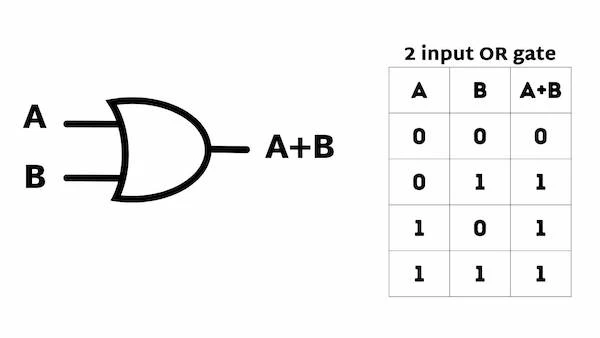


###Setup

Let us arbritarily assume the following neural network configuration.


 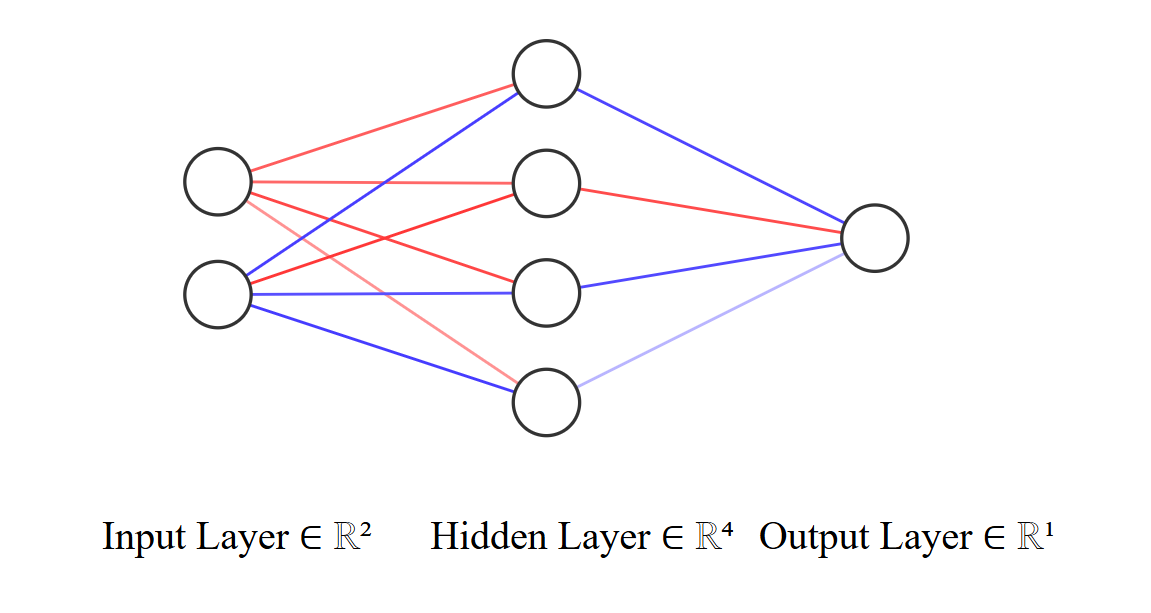



##Initialisation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt #To plot loss vs time

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Mean Squared Error loss function and its derivative
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_loss_derivative(y_true, y_pred):
    return y_pred - y_true


##Defining Neural Network class

In [ ]:

class BasicNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))
        self.learning_rate = learning_rate

    def forward(self, X):
        # Forward pass
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = sigmoid(self.final_input)
        return self.final_output

    def backward(self, X, y, output):
        # Backward pass
        output_error = mse_loss_derivative(y, output)
        output_delta = output_error * sigmoid_derivative(output)

        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output -= self.hidden_output.T.dot(output_delta) * self.learning_rate
        self.bias_output -= np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate
        self.weights_input_hidden -= X.T.dot(hidden_delta) * self.learning_rate
        self.bias_hidden -= np.sum(hidden_delta, axis=0, keepdims=True) * self.learning_rate

    def train(self, X, y, epochs):
        losses = []
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            loss = mse_loss(y, output)
            losses.append(loss)
            if epoch % 1000 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')
        return losses


##Training the model for OR gate

Epoch 0, Loss: 0.2649478595908176
Epoch 1000, Loss: 0.016336407794394218
Epoch 2000, Loss: 0.003892101285922977
Epoch 3000, Loss: 0.0019559008906437584
Epoch 4000, Loss: 0.0012573718391344448
Epoch 5000, Loss: 0.0009103425844383132
Epoch 6000, Loss: 0.0007064491141684485
Epoch 7000, Loss: 0.0005736174907429633
Epoch 8000, Loss: 0.00048080914157814066
Epoch 9000, Loss: 0.0004126057568535896
Epoch 10000, Loss: 0.00036053511371957433
Epoch 11000, Loss: 0.00031957779845871774
Epoch 12000, Loss: 0.00028658121785516094
Epoch 13000, Loss: 0.0002594707411088799
Epoch 14000, Loss: 0.0002368280430028245
Epoch 15000, Loss: 0.00021765218501318498
Epoch 16000, Loss: 0.00020121754407396937
Epoch 17000, Loss: 0.00018698582698227855
Epoch 18000, Loss: 0.00017454965623866267
Epoch 19000, Loss: 0.0001635952975572778
Epoch 20000, Loss: 0.0001538773809418479
Epoch 21000, Loss: 0.00014520135610771837
Epoch 22000, Loss: 0.00013741106406605621
Epoch 23000, Loss: 0.0001303797704366555
Epoch 24000, Loss: 0.000

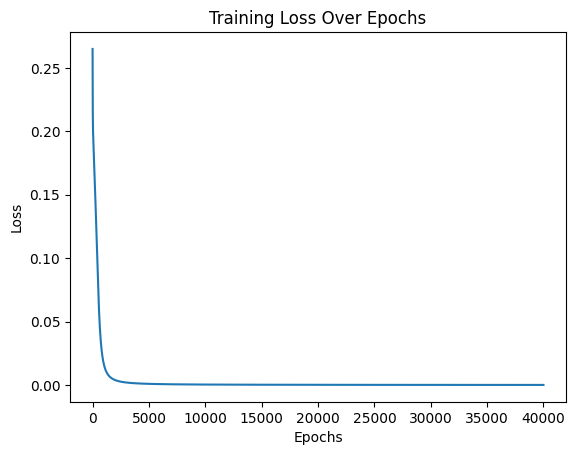

Input:
[[0 0]
 [0 1]
 [1 0]
 [1 1]] 
 Output: 
 [[0.01180095]
 [0.99175254]
 [0.99182105]
 [0.99949489]]


In [ ]:
if __name__ == "__main__":
    # OR problem
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [1]])

    nn = BasicNeuralNetwork(input_size=2, hidden_size=4, output_size=1, learning_rate=0.1)
    losses = nn.train(X, y, epochs=40000)

    # Plotting
    plt.plot(range(40000), losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Epochs')
    plt.show()

    # Testing
    print("Input:")
    print(X,"\n Output: \n",nn.forward(X))


#Basic Tensor Manipulation

##Importing Pytorch

In [ ]:
import torch

##Classification
Tensors can be used to express some commonly seen mathematical terms. They form the basis of linear algebra.



###   Scalar
A scalar is a numerical value.

###   Vector
A vector is a one-dimensional array of scalars.

###   Matrix
A matrix is a two-dimensional array of numbers, organized in rows and columns.


In [ ]:
# Scalar tensor
scalar_tensor = torch.tensor([12])
print("Scalar example-",scalar_tensor,"\n")

# Vector tensor
vector_tensor = torch.tensor([2,0,2,4])
print("Vector example-",vector_tensor,"\n")

# Matrix tensor
matrix_tensor = torch.tensor([[2, 0, 2,4], [2, 0, 2,5]])
print(f"Matrix example-\n{matrix_tensor}\n")


Scalar example- tensor([12]) 

Vector example- tensor([2, 0, 2, 4]) 

Matrix example-
tensor([[2, 0, 2, 4],
        [2, 0, 2, 5]])



##Tensor Initialisation

###```torch.zeros()```
* Intitialise each value to be 0

###```torch.ones()```
* Initialise each value to be 1

###```torch.rand()```
* Randomises values of the tensor to be between 0 and 1



In [ ]:
tensor_zeros = torch.zeros((2, 3))
tensor_ones = torch.ones((5, 6))
tensor_random = torch.rand((1, 6,1))
print(tensor_zeros)
print(tensor_ones)
print(tensor_random)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])
tensor([[[0.2979],
         [0.6141],
         [0.6484],
         [0.3834],
         [0.4308],
         [0.4308]]])


##Element-wise Operations

### ```A+B```


* Add corresponding values of two tensors

###```A-B```
* Subtract corresponding values of two tensors

###```A*B```
* Multiply corresponding values of two tensors

###```A/B```
* Divide corresponding values of two tensors



In [ ]:
A=torch.tensor([[1,2],[3,4]])
B=torch.tensor([[1,0],[0,1]])

print(f"A+B =\n{A+B}\n")#Addition
print(f"A-B =\n{A-B}\n")#Subtraction
print(f"A*B =\n{A*B}\n")#Multiplication
print(f"A/B =\n{A/B}\n")#Division

A+B =
tensor([[2, 2],
        [3, 5]])

A-B =
tensor([[0, 2],
        [3, 3]])

A*B =
tensor([[1, 0],
        [0, 4]])

A/B =
tensor([[1., inf],
        [inf, 4.]])



##Tensor Operations

###```A@B```
* Multiply two given tensors

###```A.t()```
* Return transpose of A

###```torch.inverse(A.float())```
* Return inverse of A





In [ ]:
A=torch.tensor([[1,2],[3,4]])
B=torch.tensor([[1,0],[0,1]])

print(f"A@B =\n{A@B}\n")#Matrix multiplication
print(f"A.t() =\n{A.t()}\n")#Transpose operation
print(f"torch.inverse(A.float()) =\n{torch.inverse(A.float())}\n")#Transpose operation


A@B =
tensor([[1, 2],
        [3, 4]])

A.t() =
tensor([[1, 3],
        [2, 4]])

torch.inverse(A.float()) =
tensor([[-2.0000,  1.0000],
        [ 1.5000, -0.5000]])



##Tensor Initialisation

###```torch.sum(A)```
* Returns sum of all values in A

###```torch.mean(A.float())```
* Find mean of all elements in the matrix

###```torch.max(A)```
* returns element in A which has the greatest value

###```torch.min(A)```
* returns element in A which has the least value

In [ ]:
A=torch.tensor([[1,2],[3,4]])
print("Sum of elements in A =",float(torch.sum(A)))# Sum of elements
print("Mean of elements in A =",float(torch.mean(A.float())))# Mean of elements
print("Maximum element in A =",float(torch.max(A)))# Maximum element
print("Minimum element in A =",float(torch.min(A)))# Minimum element




Sum of elements in A = 10.0
Mean of elements in A = 2.5
Maximum element in A = 4.0
Minimum element in A = 1.0


## Tensor Operations

### Slicing
* Used to extract a specific slice of a tensor to perform operations.

### Reshaping
* Used to change the shape of a tensor to fit certain required dimensions.


In [ ]:
A=torch.tensor([[1,2,5],[4,6,4]])
sliced_A = A[:, 0] #To return a slice of A
reshaped_A = A.view(1, 6) #To return a reshape of A

print(f"First column of A = {sliced_A}\n")
print(A.shape,"\n")
print(f"A reshaped to (1, 6) = {reshaped_A}\n")



First column of A = tensor([1, 4])

torch.Size([2, 3]) 

A reshaped to (1, 6) = tensor([[1, 2, 5, 4, 6, 4]])



#OR Gate using Pytorch


##Introduction

The same classification problem can be achieved by using pytorch intead of raw formulae.

###Background
```torch.nn.Module```
*   This helps in defining layers, activation functions, and performing the forward pass
* By inheriting from this class, we can create custom neural network architectures.

```autograd```
*   This automatically computes gradients during the backward pass. Thus **eliminating the need to manually derive and implement backpropagation.**
* This feature greatly simplifies the process of training neural networks.


###Layers

Layers in PyTorch are building blocks of neural networks.
Common layers include:

* ```nn.Linear```: For fully connected layers
* ```nn.Conv2d```: For convolutional layers in image processing
* ```nn.RNN``` and ``` nn.LSTM```: For sequential data processing


###Activation Functions

These introduce non-linearity into the network, allowing it to learn complex patterns.

Common activation functions in PyTorch include:

* ```nn.ReLU```: Rectified Linear Unit
* ```nn.Sigmoid```: Sigmoid function
* ```nn.Tanh```: Hyperbolic tangent

###Loss Functions

Loss functions measure the difference between the model's predictions and the true values.
PyTorch provides various loss functions like:

* ```nn.MSELoss```: Mean Squared Error for regression tasks
* ```nn.CrossEntropyLoss```: For multi-class classification problems

###Optimisers
Optimizers update the model's parameters to minimize the loss function.
PyTorch offers several optimizers, including:

* ```optim.SGD```: Stochastic Gradient Descent
* ```optim.Adam```: Adaptive Moment Estimation, often used for its good performance

###Batching
Pytorch provides DataLoader class to easily create batches of data.
You can specify the batch size, shuffle the data, and even use multiple workers for data loading.

```train_loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)```

##Initialisation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# OR dataset
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32)



##Defining classes

In [ ]:
import torch.nn.functional as F

# Define a neural network class inheriting from nn.Module
class ORNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ORNet, self).__init__()  # Call the constructor of the nn.Module parent class to initialize the module

        # Define layers of the neural network
        self.hidden = nn.Linear(input_size, hidden_size)  # Input layer to hidden layer
        self.out = nn.Linear(hidden_size, output_size)    # Hidden layer to output layer
        self.sigmoid = nn.Sigmoid()                      # Sigmoid activation function

    def forward(self, x):
        # Define the forward pass of the network
        x = self.sigmoid(self.hidden(x))  # Apply hidden layer followed by sigmoid activation
        x = self.sigmoid(self.out(x))     # Apply output layer followed by sigmoid activation
        return x

# Create an instance of the model
model = ORNet(input_size=2, hidden_size=4, output_size=1)

# Define loss function and optimizer
criterion = nn.MSELoss()                           # Mean Squared Error loss function
optimizer = optim.SGD(model.parameters(), lr=0.1)  # Stochastic Gradient Descent optimizer with learning rate 0.1


##Training Model

In [ ]:
# Training loop
losses = []           # List to store the loss at each epoch
epochs = 40000        # Number of training epochs
for epoch in range(epochs):
    # Forward pass
    outputs = model(X)               # Compute the output of the model for input X
    loss = criterion(outputs, y)     # Compute the loss between model output and target y

    # Backward pass and optimization
    optimizer.zero_grad()            # Zero the gradients to prevent accumulation
    loss.backward()                  # Backpropagate the loss to compute gradients
    optimizer.step()                 # Update the model parameters based on gradients calculated

    losses.append(loss.item())       # Store the loss value for this particular epoch

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')  # Print loss every 1000 epochs


Epoch 0, Loss: 0.2868
Epoch 1000, Loss: 0.0756
Epoch 2000, Loss: 0.0170
Epoch 3000, Loss: 0.0070
Epoch 4000, Loss: 0.0040
Epoch 5000, Loss: 0.0027
Epoch 6000, Loss: 0.0020
Epoch 7000, Loss: 0.0016
Epoch 8000, Loss: 0.0013
Epoch 9000, Loss: 0.0011
Epoch 10000, Loss: 0.0009
Epoch 11000, Loss: 0.0008
Epoch 12000, Loss: 0.0007
Epoch 13000, Loss: 0.0006
Epoch 14000, Loss: 0.0006
Epoch 15000, Loss: 0.0005
Epoch 16000, Loss: 0.0005
Epoch 17000, Loss: 0.0005
Epoch 18000, Loss: 0.0004
Epoch 19000, Loss: 0.0004
Epoch 20000, Loss: 0.0004
Epoch 21000, Loss: 0.0003
Epoch 22000, Loss: 0.0003
Epoch 23000, Loss: 0.0003
Epoch 24000, Loss: 0.0003
Epoch 25000, Loss: 0.0003
Epoch 26000, Loss: 0.0003
Epoch 27000, Loss: 0.0003
Epoch 28000, Loss: 0.0002
Epoch 29000, Loss: 0.0002
Epoch 30000, Loss: 0.0002
Epoch 31000, Loss: 0.0002
Epoch 32000, Loss: 0.0002
Epoch 33000, Loss: 0.0002
Epoch 34000, Loss: 0.0002
Epoch 35000, Loss: 0.0002
Epoch 36000, Loss: 0.0002
Epoch 37000, Loss: 0.0002
Epoch 38000, Loss: 0.0002

##Plotting and Testing

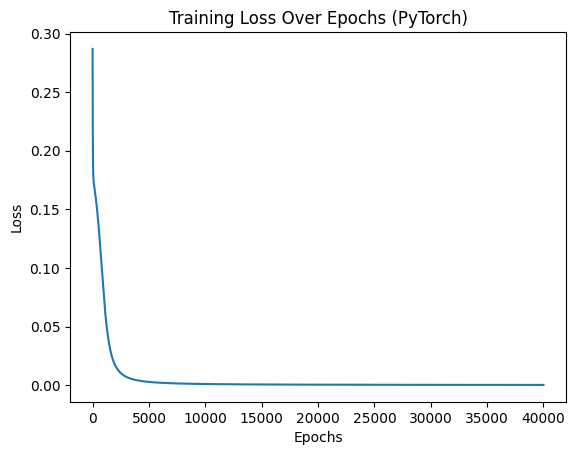

Output after training:
[[0.01794683]
 [0.9876967 ]
 [0.987615  ]
 [0.99915457]]


In [ ]:
# Plotting the loss over epochs
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs (PyTorch)')
plt.show()

# Testing
with torch.no_grad():
    predicted = model(X)
    predicted = predicted.numpy()
    print("Output after training:")
    print(predicted)

#Pytorch Implementation

##Importing Libraries
Firstly we must import all essential libraries as shown below.

Note that here `Scikit-learn` is used for dataset loading and preprocessing

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau  #Used to reduce learning rate once loss plateaus
from sklearn.datasets import load_iris #To import iris dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

##Loading and Preparing the Data

Now we must load data from a dataset. In this case we will use the well known Iris dataset that has data associated with flowers. We load the data and convert it into pytorch tensors.

In [ ]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Normalize the input features to improve performance and reduce training time
scaler = StandardScaler() # Create a StandardScaler object for normalization
X = scaler.fit_transform(X) # Fit the scaler to the data and transform it

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Define Model
Here a model is defined by the name of IrisNet. We have chosen a configuration that is composed of only one hidden layer.

 Our objective is to predict the species of flower on the basis of four parameters namely- sepal length, sepal width, petal length, and petal width.

In [ ]:
class IrisNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(IrisNet, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.out = nn.Linear(hidden_size, num_classes)

        # Weight initialization
        nn.init.kaiming_uniform_(self.hidden.weight)
        nn.init.kaiming_uniform_(self.out.weight)

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.out(x)
        return x

##Setting Up Training Parameters


In [ ]:
# Hyperparameters
input_size = X.shape[1]
hidden_size = 32
num_classes = len(torch.unique(y))
batch_size = 32
learning_rate = 0.001
epochs = 1000

# Create data loader for batch processing
train_dataset = torch.utils.data.TensorDataset(X_train, y_train) # Create a dataset from training tensors
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True) # DataLoader to load the data in batches and shuffle it for each epoch


# Initialize model, loss function, optimizer, and learning rate scheduler
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available, otherwise CPU
model = IrisNet(input_size, hidden_size, num_classes).to(device)  # Initialize the model and move it to the device
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss function for classification tasks
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Adam optimizer with specified learning rate
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True) # Learning rate scheduler to reduce the learning rate when the loss stops decreasing

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


##Training Loop

In [ ]:
losses = []
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()

        # Gradient clipping to prevent extreme updates
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()
        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    losses.append(avg_loss)
    scheduler.step(avg_loss)

    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')

Epoch [50/1000], Loss: 0.2511
Epoch [100/1000], Loss: 0.1574
Epoch [150/1000], Loss: 0.1077
Epoch [200/1000], Loss: 0.0886
Epoch [250/1000], Loss: 0.0773
Epoch [300/1000], Loss: 0.0738
Epoch [350/1000], Loss: 0.0731
Epoch [400/1000], Loss: 0.0771
Epoch [450/1000], Loss: 0.0728
Epoch [500/1000], Loss: 0.0801
Epoch [550/1000], Loss: 0.0769
Epoch [600/1000], Loss: 0.0743
Epoch [650/1000], Loss: 0.0764
Epoch [700/1000], Loss: 0.0762
Epoch [750/1000], Loss: 0.0728
Epoch [800/1000], Loss: 0.0755
Epoch [850/1000], Loss: 0.0727
Epoch [900/1000], Loss: 0.0742
Epoch [950/1000], Loss: 0.0767
Epoch [1000/1000], Loss: 0.0742


##Plotting Loss with time

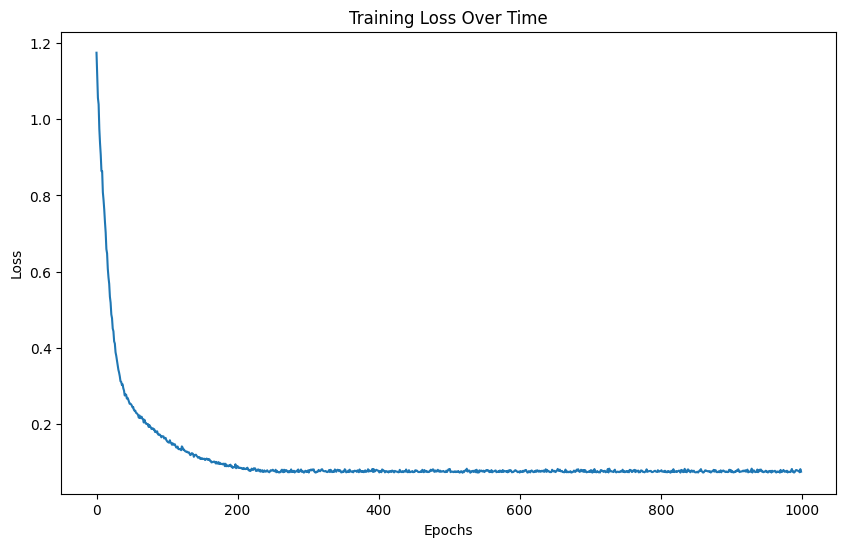

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.show()

##Testing the model

In [ ]:
model.eval() # Set the model to evaluation mode
with torch.no_grad(): # Disable gradient calculation
    outputs = model(X_test.to(device))  # Get the model's predictions for the test set
    _, predicted = torch.max(outputs, 1) # Get the predicted class indices
    accuracy = (predicted == y_test.to(device)).sum().item() / len(y_test) # Calculate accuracy
    print(f'Accuracy on test set: {accuracy:.2f}') # Print the accuracy

Accuracy on test set: 1.00
